## Introduction

This competition is hosted by the third largest insurance company in Brazail: Porto Seguro with the task of predcting the probability that a driver will initate an insurance claim in the next year

Thist notebook will aim to provide some interactive charts and analysis of the competition data by way of the Python visualization library Plot.ly and hopefully bring some insights and beautiful plots that others can take and replicate. Plot.ly is one of the main products offered by software company - Plotly which specializes in providing online graphical and statsistical visuallisations ( charts and dashboards ) as well as providing an API to a whole rich suite of programming languages and tools such as Python, R, Matlab, Node.js etc

Listed below for easy conveience are links to the various Plotly plots in this notebook:
   - Simple horizontal bar plot - Used to inspect the Target variable distribution
   - Correlation Heatmap plot - Inspect the correlation between the different features
   - Scatter plot - Compare the feature importances generated by Random Forest and Gradient-Boosted model
   - Vertical bar plot - List in Descending order, the importance of the various features
   - 3D Scatter plot
       

The themes in this notebook can be briefly summarized follows:

**1.Data Quality Checks** - visualising and evaluating all missing/Null values (values that are -1)
**2.Feature inspection and filtering** - Correaltion and feature Mutual information plots aginst the target variable. Inspection fo the Binary, categorical and other variables.
**3.Feature importance ranking via learning models** - Building a Random Forest and Gradient Boosted model to help us rank feautes based off the learning process.

In [1]:
# Let us load in the relevant Python modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

Let us load in the training data provided using Pandas:

In [2]:
train = pd.read_csv('./data/train.csv')
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


In [7]:
train.isna().any()

id                False
target            False
ps_ind_01         False
ps_ind_02_cat     False
ps_ind_03         False
ps_ind_04_cat     False
ps_ind_05_cat     False
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03         False
ps_car_01_cat      True
ps_car_02_cat      True
ps_car_03_cat      True
ps_car_04_cat      True
ps_car_05_cat      True
ps_car_06_cat      True
ps_car_07_cat      True
ps_car_08_cat      True
ps_car_09_cat      True
ps_car_10_cat      True
ps_car_11_cat      True
ps_car_11          True
ps_car_12          True
ps_car_13          True
ps_car_14          True
ps_car_15          True
ps_calc_01         True
ps_calc_02         True
ps_calc_03      

In [8]:
# Taking a looka at how many rows and columns the train dataset contains
rows = train.shape[0]
columns = train.shape[1]

print("The train dataset contains {0} rows and {1} columns".format(rows, columns))

The train dataset contains 517472 rows and 59 columns


## 1. Data Quality checks

**Null or missing values check**

As part of our quality checks, let us quick look at whether there are any null values in the train dataset as follows:


In [9]:
#any() applied twice to check run the isnull check across all columns.

train.isnull().any()

id                False
target            False
ps_ind_01         False
ps_ind_02_cat     False
ps_ind_03         False
ps_ind_04_cat     False
ps_ind_05_cat     False
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03         False
ps_car_01_cat      True
ps_car_02_cat      True
ps_car_03_cat      True
ps_car_04_cat      True
ps_car_05_cat      True
ps_car_06_cat      True
ps_car_07_cat      True
ps_car_08_cat      True
ps_car_09_cat      True
ps_car_10_cat      True
ps_car_11_cat      True
ps_car_11          True
ps_car_12          True
ps_car_13          True
ps_car_14          True
ps_car_15          True
ps_calc_01         True
ps_calc_02         True
ps_calc_03      

517471에 NaN 값이 있음. 참고하고 있는 커널과 다른 부분이라 삭제.



In [10]:
train = train[:517471]

In [11]:
train.isnull().any().any()

False

 - Our null values check returns False but however, this does not really mean that this case has been closed as the data is also described as "Values of -1" indicate that the feature was missing from the observation". Therefore i take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data

Here we can see that whick columns contained -1 in their values so we could easily for example make a blanket replacement fo all -1 with nulls first as follows:

In [19]:
calc_ftoi = train.loc[:,  ['ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08','ps_calc_09', 
                           'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']]

calc_ftoi = calc_ftoi.applymap(lambda x : int(x))

train.drop(['ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08','ps_calc_09', 
                           'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14'], axis = 1, inplace = True)

train = pd.concat([train, calc_ftoi], axis = 1)

In [20]:
train_copy = train

train_copy = train_copy.replace(-1, np.NaN)

missingno를 통해 NaN 분포 확인

!pip install missingno

<AxesSubplot:>

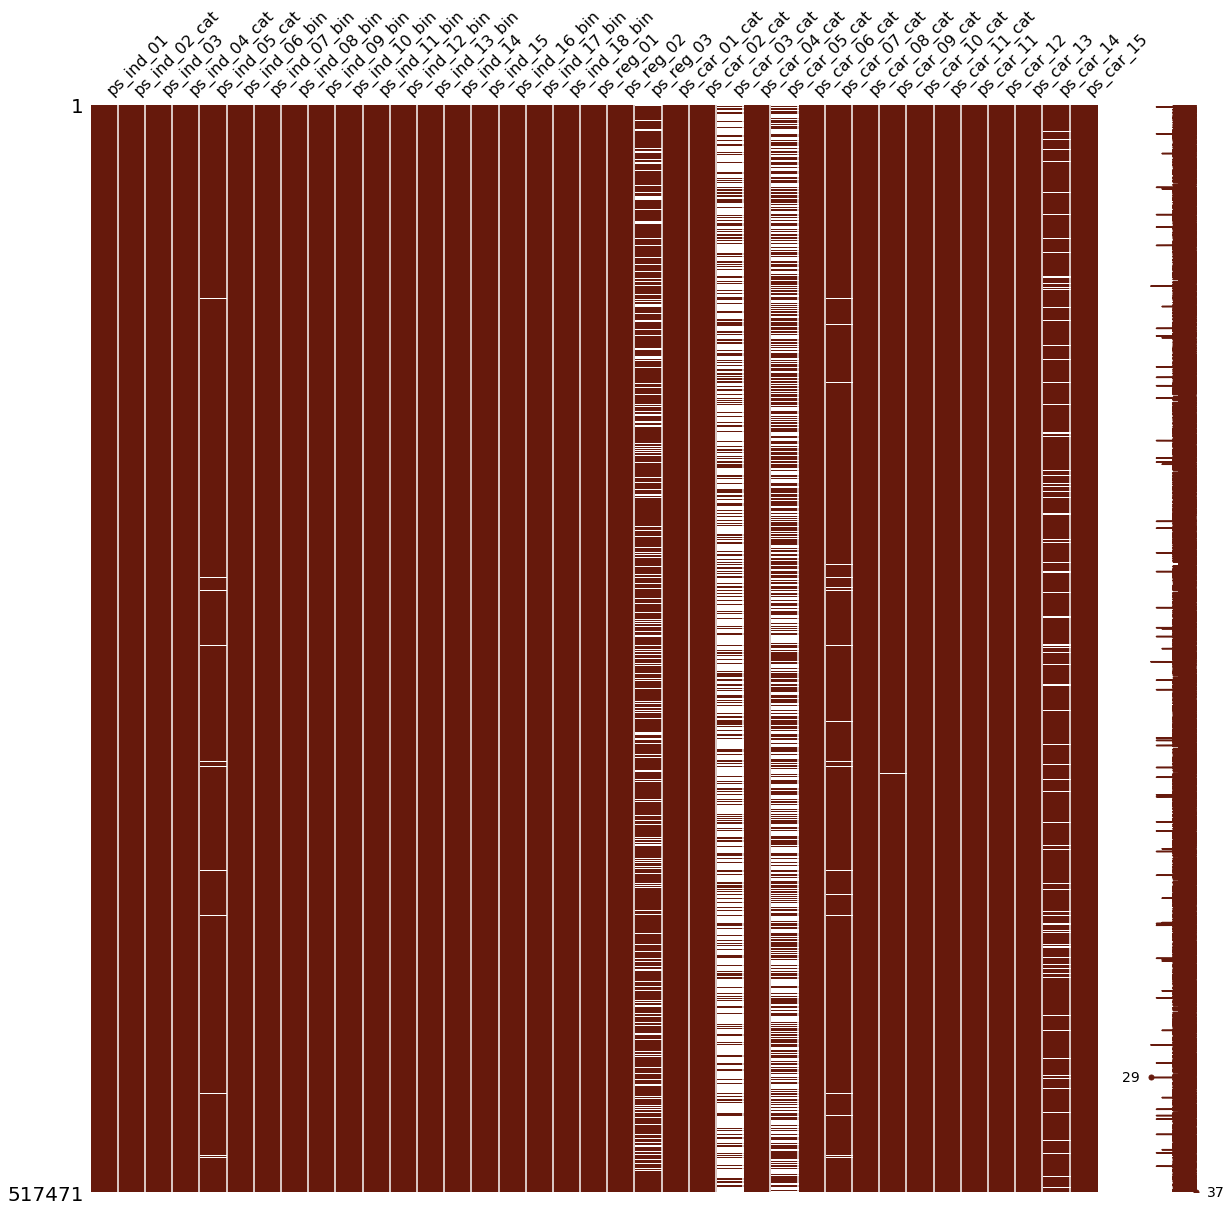

In [21]:
import missingno  as msno

# Nullity or missing values by columns

msno.matrix(df=train_copy.iloc[:, 2:39], figsize = (20,20), color=(0.4, 0.1, 0.05))

As we can see, the missing values now become much more apparent and clear when we visualise it, where the empty white bands (data that is missing) superposed on the vertical dark red bands (non-missing data) reflect the nullity of the data in that particular column. In this instance, we can observe that there are 7 features out of the 59 total features (although as rightly pointed out by Justin Nafe in the comments section there are really a grand total of 13 columns with missing values) that actually contained null values. This is due to the fact that the missingno matrix plot can only comfortable fit in approximately 40 odd features to one plot after which some columns may be excluded, and hence the remaining 5 null columns have been excluded. To visualize all nulls, try changing the figsize argument as well as tweaking how we slice the dataframe.

For the 7 null columns that we are able to observe, they are hence listed here as follows:

<b>ps_ind_05_cat | ps_reg_03 | ps_car_03_cat | ps_car_05_cat | ps_car_07_cat | ps_car_09_cat | ps_car_14</b>

Most of the missing values occur in the columns suffixed with _cat. One should really take further note of the columns ps_reg_03, ps_car_03_cat and ps_car_05_cat. Evinced from the ratio of white to dark bands, it is very apparent that a big majority of values are missing from these 3 columns, and therefore a blanket replacement of -1 for the nulls might not be a very good strategy.

**Target variable inspection**

Another standard check normally conducted on the data is with regard to our target variable, where in this case, the column is conveniently titled "target". The target value also comes by the moniker of class/label/correct answer and is used in supervised learning models along with the corresponding data that is given (in our case all our train data excpet the id coluumn) to learn the function that best maps the data to our target in the hope that this learned function can generalize and predict well with new unseen data

In [22]:
data = [go.Bar(
    x = train['target'].value_counts().index.values,
    y = train['target'].value_counts().values,
    text='Distribution of target variable')]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

Hmm.the target variable is rather imbalanced so it might be something to keep in mind. An imbalanced target will prove quite

**Datatype check**

This check is carried out to see what kind dof datatypes the train set is comprised of :integers or characters of float just to gain a better overview of the data we were porvided with. One trick to obtain counts of the unique types in a python sequence is to use the Counter method, when you import the Collections module as follows:

In [23]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 31, dtype('float64'): 28})

As alluded to above, there are a total of 59 columns that make up the train dataset and as we can observe from this check, the features/columns consist of only two datatypes - Integer and floats.

Another point to note is that Porto Seguro has actually provided us data with headers that come suffixed with abbreviations such as '_bin', '_cat' and '_reg', where they have given us a rough explanaiton that _bin indicates binary features while _cat indicates categorical features whilest the rest are eigher continuous or ordinary features. Here i shall simplify this a bit further just by looking at float values (probably only the continuous features) and integer datatypes (binary, categorical and ordinary features).

In [24]:
train_float = train.select_dtypes(include = ['float64'])
train_int = train.select_dtypes(include = ['int64'])

In [26]:
train_float.columns

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='object')

## Correlation plots


As a starter, let us generate some linear correlations plots just to have a quick look at how a features is linearly correlated to the next the perhaps start gaining some insights from here. At this juncture. I will use the seaborn statiscal visualisation package to plot a heatmap of the correlation value. Conveniently, Pandas dataframes come with the corr() method inbuilt, whick calculates the Pearson correlation. Also as convenient is Seaborn's way of invoking a correlation plot. Just literally the word "heatmap"

<AxesSubplot:title={'center':'Pearson correation of continuous features'}>

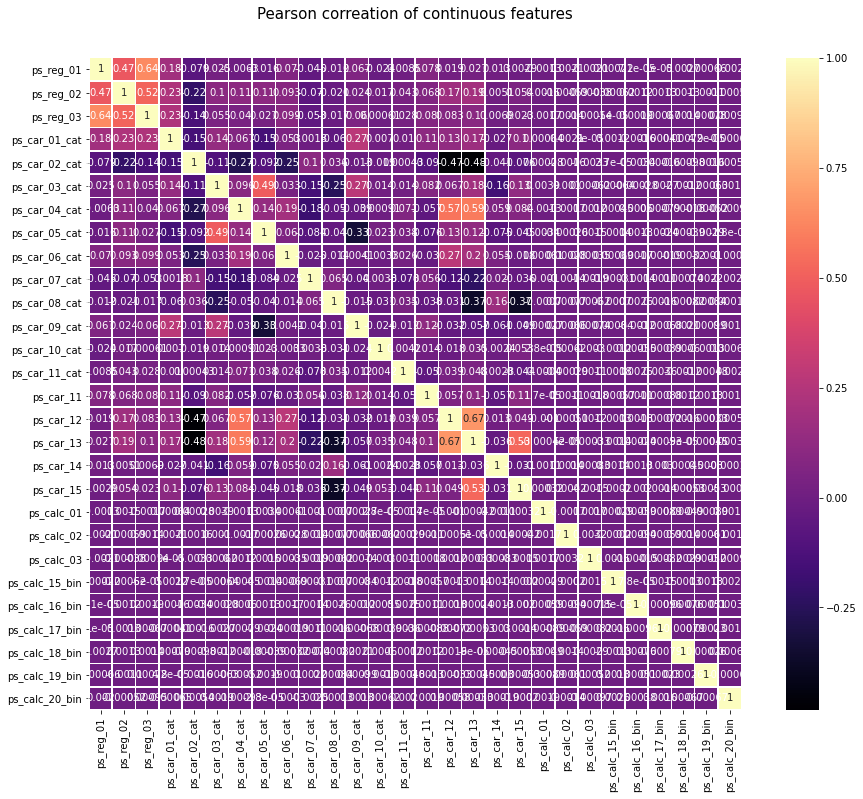

In [25]:
colormap = plt.cm.magma

plt.figure(figsize=(16, 12))
plt.title('Pearson correation of continuous features', y=1.05, size=15)
sns.heatmap(train_float.corr(), linewidths=0.5, vmax=1.0, square = True,
           cmap = colormap, linecolor='white', annot=True)

In [ ]:
sorted

In [33]:
data = [
    go.Heatmap(
    z= train_int.corr().values,
    x= sorted(train_int.columns.values),
    y= sorted(train_int.columns.values),
    colorscale='Viridis',
    reversescale=False,
    opacity=1.0)
]

layout = go.Layout(
    title = 'Pearson Correation of Integer-type features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks=''),
    width=900, height=700)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

Similarly, we can observe that there are a huge number of columns that are not linearly correlated with each other at all, evident from the fact that we observe quite a lot of 0 value cells in our correlation plot. This is quite a useful observation to us, especially if we are trying to perform dimensionality reduction transformations such as Principal Component Analysis (PCA), this would require a certain degree of correlation . We can note some features of interest are as follows:

**Negatively correlated features : ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin**

One interesting aspect to note is that in our earlier analysis on nullity, ps_car_03_cat and ps_car_05_cat were found to contain many missing or null values. Therefore it should come as no surprise that both these features show quite a strong positive linear correlation to each other on this basis, albeit one that may not really reflect the underlying truth for the data.

## Mutual Information plots

Mutual information is another useful tool as it allows one to inspect the mutual information between the target variable and the corresonding feature it is calculated against. For classification problems, we can conveniently call Sklearn's mutual_info_classif method which measures the dependency between two random variables and ranges from zero(where the random variables are independent of each other) to higher values (indicate some dependecy). This therefore will help give us an idea of how much information from the target may be contained within the featues.

- discrete_feature(categorical) = discrete_features = True / continuos = False / default = auto

In [34]:
mf= mutual_info_classif(train_float.values, train.target.values, n_neighbors=3, random_state=42)
print(mf)

[0.0111427  0.00407473 0.00442901 0.02842176 0.08295564 0.06158413
 0.00336978 0.03441059 0.01383124 0.10327213 0.08362216 0.0635356
 0.11694459 0.00588967 0.0500054  0.00732875 0.00143516 0.00226905
 0.01070115 0.00452205 0.0045065  0.00461567 0.00162081 0.04706271
 0.03694825 0.00896244 0.01420526 0.0027024 ]


## Binary features inspection

Another aspect of the data that we may want to inspect would be the columns that only contain binary values, i.e where values take on only either of the two values 1 or 0. Proceeding, we store all columns that contain these binary values and then generate a vertical plotly barplot of these binary values as follows:

In [36]:
bin_col = [col for col in train.columns if '_bin' in col]

zero_list = []
one_list = []

for col in bin_col:
    zero_list.append((train[col] == 0).sum())
    one_list.append((train[col] == 1).sum())

In [40]:
trace1 = go.Bar(
    x = bin_col,
    y = zero_list,
    name = 'Zero Count')

trace2 = go.Bar(
    x = bin_col,
    y = one_list,
    name = 'One Count')

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'stacked-bar')

Here we observe that there are 4 features : ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros. This bags the question of whether these features are useful at all as they do not contain much information about the other class vis-a-vis  the target

## Categorical and Ordinal feature inspection

Let us firset take a look at the features that are termed categorical as epr their suffix "_cat"

In [ ]:
train.iloc[:, 2].va

In [46]:
cat_col = [col for col in train.columns if '_cat' in col]

catNums = [ train[col].value_counts() for col in cat_col]


In [52]:
catNums

[ 1    375727
  2    107219
  3     24468
  4      9873
 -1       184
 Name: ps_ind_02_cat, dtype: int64,
  0    301705
  1    215695
 -1        71
 Name: ps_ind_04_cat, dtype: int64,
  0    458959
  6     17923
  4     16004
  1      7242
  3      7202
 -1      5081
  2      3627
  5      1433
 Name: ps_ind_05_cat, dtype: int64,
  11.0    180642
  7.0     155752
  6.0      54274
  10.0     43557
  4.0      22776
  9.0      17574
  5.0      15780
  8.0      13088
  3.0       5765
  0.0       5131
  2.0       1846
  1.0       1195
 -1.0         91
 Name: ps_car_01_cat, dtype: int64,
  1.0    429466
  0.0     88002
 -1.0         3
 Name: ps_car_02_cat, dtype: int64,
 -1.0    357507
  1.0     96103
  0.0     63861
 Name: ps_car_03_cat, dtype: int64,
 0.0    431850
 1.0     27911
 2.0     20639
 8.0     17850
 9.0     16515
 6.0      1358
 3.0       562
 5.0       460
 4.0       205
 7.0       121
 Name: ps_car_04_cat, dtype: int64,
 -1.0    231662
  1.0    150251
  0.0    135558
 Name: ps

## Feature importance via Random Forest 
Let us now implement a Random Forest model where we fit the training data with a Random Forest Classifier and look at the ranking of the features after the model has finisihed training. This is a quick way of using an ensemble model (ensemble of weak decision tree learner applied under Bootstrap aggregated) whick does not require much parameter tuning in obtaining useful feature importances and is also pretty robust to target imbalances. We call the Random Forest as follws:

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=8, 
                            min_samples_leaf=4, 
                            max_features=0.2, 
                            n_jobs=-1, random_state=42)

rf.fit(train.drop(['id', 'target'], axis = 1), train.target)

features = train.drop(['id', 'target'], axis = 1).columns.values

print('------ Training Done ------')


------ Training Done ------


In [56]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [57]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

### Decision Tree visualisation

One other interesting trick or technique oft used would be to visualize the tree branches or decisions made by the model. For simplicity, I fit a decision tree (of max_depth = 3) and hence you only see 3 levels in the decision branch, use the export to graph visualization attribute in sklearn "export_graphviz" and then export and import the tree image for visualization in this notebook.

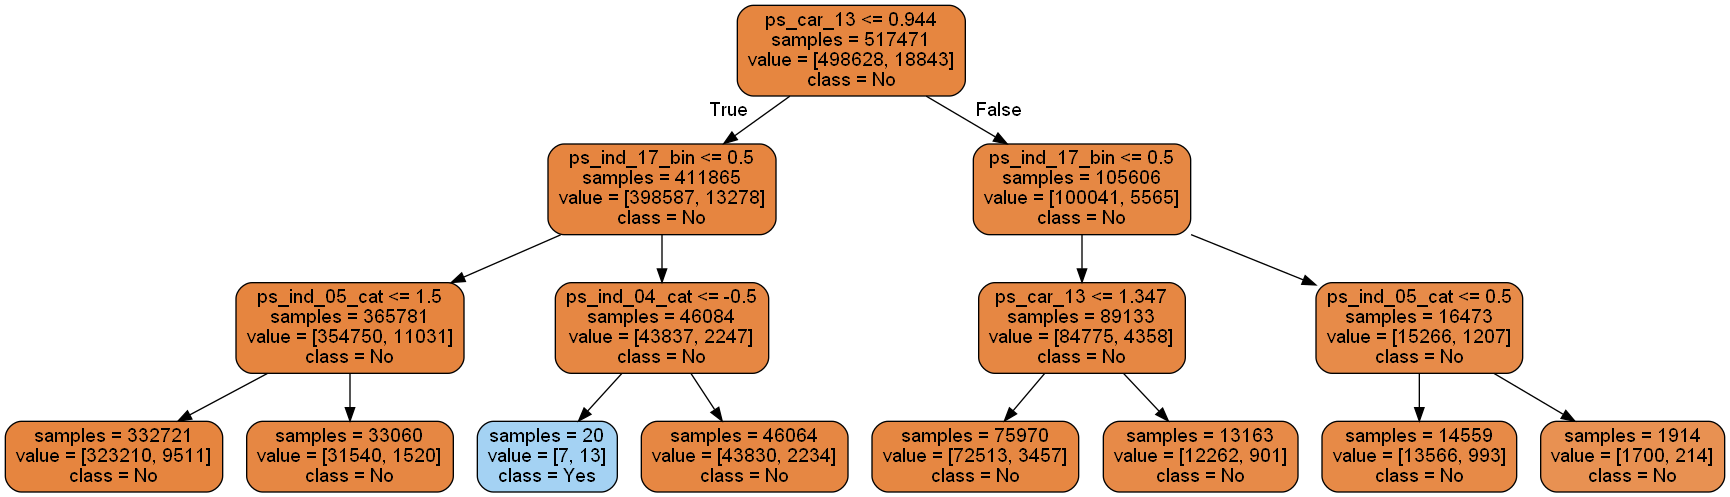

In [58]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(train.drop(['id', 'target'],axis=1), train.target)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = train.drop(['id', 'target'],axis=1).columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png",)

## Feature importance via Gradient Boosting model

Just for curiosity, let us try another learning method in getting our feature importances. This time, we use a Gradient Boosting classifier to fit to the training data . Gradient Boosting proceeds in a forward stage-wise fashion, where at each stage regression tress are fitted on the gradient of the loss function (which defaults to the deviance in Sklearn implementation).



In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, min_samples_leaf=4, max_features=0.2, random_state=0)
gb.fit(train.drop(['id', 'target'],axis=1), train.target)
features = train.drop(['id', 'target'],axis=1).columns.values
print("----- Training Done -----")

----- Training Done -----


In [60]:
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Machine Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [61]:
x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Gradient Boosting Classifer Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')